# Classifying Boolean Values
Michaela Webster - mawebster9

Before we begin anything, we need to import all of the libraries/functions that we will be using throughout our notebook. Pandas is a crucial part of this process since it houses our data. Another important feature of this process is the scikit-learn library - this library is our one-stop-shop for our machine learning needs. 

In [69]:
#our data structure
import pandas as pd

#bag of words vectorizer - take inverse frequency of words to assign weights
from sklearn.feature_extraction.text import TfidfVectorizer

import matplotlib.pyplot as plt

#split data into training/test data, validate our models, and specify number of folds for training/test data
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold 

# our 5 classification models
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler

## 1. Import Data and Set X & y

For this example, we will focus on all of the boolean fields. The boolean fields are all of the true/false values and can account for a lot of different attributes that contain a lot of useful data surrounding a case. Our goal is to see if the true/false fields can be used to determine whether a case should be denied or granted with high accuracy. For this, our X is all of the true/false fields and its associated label, or y, is the denied field.

In [70]:
#connect to CSV file that contains our data
path_to_file = "https://raw.githubusercontent.com/mawebster9/ThesisCode/master/appeals_query.csv"

#open, read, and store our data into a pandas dataframe
appeals_data = pd.read_csv(path_to_file, encoding='latin-1')

In [71]:
#assign our attributes to X (all boolean fields) and y
X = appeals_data.select_dtypes('bool')
y = X['Denied']

In [72]:
#remove the 'Denied' field from the X data frame
X = X.drop('Denied',axis=1)

In [73]:
#print the first record in X to verify the previous step
X.iloc[0]

Smith                     False
Female                    False
Position_Eligibility      False
No_Falsification          False
Rebut_Falsification       False
Falsification(s)           True
Domestic_Violence         False
Previous_Clearance        False
Traumatic_Life_Event      False
Caused_Death              False
Child_Sexual_Abuse        False
Child_Pornography         False
Prostitutes               False
Fmr_Military_LawE         False
Adverse_Affirmed          False
Favorable_Affirmed        False
Granted                   False
Failed_to_Mitigate        False
Success_to_Mitigate       False
Adverse_Reversed          False
Revoked_Fav_Reversed      False
Adverse_Remanded          False
Favorable_Remanded        False
Remanded_wInstructions    False
Recommend_Waiver          False
Decision_Other            False
Decision_Unknown          False
Security_Violations       False
Foreign_Influence         False
Foreign_Preference        False
Sexual_Behavior           False
Personal

## 2. Set-up X: Fix Boolean Values

We need to set up our X values in a way that a machine learning algorithm can understand it. In order to do this we need to change our true/false values into a numeric format. To do this, we need to change all true values to 1.0 and all false values to 0.0.

In [74]:
#replace all instances: True = 1.0, False = 0.0
X.columns.tolist()
for i in (X.columns.tolist()):
    X[i] = X[i].replace(True,1)

In [75]:
#print out top 10 records in X to ensure True was changed to 1.0 and False was changed to 0.0
X.head(10)

,Smith,Female,Position_Eligibility,No_Falsification,Rebut_Falsification,Falsification(s),Domestic_Violence,Previous_Clearance,Traumatic_Life_Event,Caused_Death,...,Alcohol,Drugs,Emotional_Mental,Criminal_Conduct,Handling_PI,Outside_Activities,Use_InfoSys,Deception,CAC,Unknown_Guideline
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
#Alternatively, you could print the first record in X
X.iloc[0]

Smith                     0.0
Female                    0.0
Position_Eligibility      0.0
No_Falsification          0.0
Rebut_Falsification       0.0
Falsification(s)          1.0
Domestic_Violence         0.0
Previous_Clearance        0.0
Traumatic_Life_Event      0.0
Caused_Death              0.0
Child_Sexual_Abuse        0.0
Child_Pornography         0.0
Prostitutes               0.0
Fmr_Military_LawE         0.0
Adverse_Affirmed          0.0
Favorable_Affirmed        0.0
Granted                   0.0
Failed_to_Mitigate        0.0
Success_to_Mitigate       0.0
Adverse_Reversed          0.0
Revoked_Fav_Reversed      0.0
Adverse_Remanded          0.0
Favorable_Remanded        0.0
Remanded_wInstructions    0.0
Recommend_Waiver          0.0
Decision_Other            0.0
Decision_Unknown          0.0
Security_Violations       0.0
Foreign_Influence         0.0
Foreign_Preference        0.0
Sexual_Behavior           0.0
Personal_Conduct          1.0
Financial                 0.0
Alcohol   

## 3. Set-up y: Fix Boolean Values

We have our X values set up in a way that a machine learning algorithm can understand it, but now we need to fix our y values. In order to do this we need to change our true/false values into a numeric format. To do this, we need to change all true values to 1.0 and all false values to 0.0.

In [77]:
#replace: True = 1.0, False = 0.0
y = y.replace(True,1)

In [78]:
#print out counts for all y records - ensure that our replace statement worked
y.value_counts()

1.0    10862
0.0     9652
Name: Denied, dtype: int64

In [79]:
#Alternatively, you could print the first record in y
y.iloc[0]

1.0

### Final Data Check

Now that our X and y are in the right format, we need to ensure one last time that the dimensions of each variable are correct. For our X, we see that there are 20,514 rows (number of records)and 43 columns (number of boolean attributes - minus 'Denied' -in dataset). For our y, we see that there are 20,514 rows and no columns.

Our data has passed the check and is ready to be used.

In [80]:
X.shape

(20514, 43)

In [81]:
y.shape

(20514,)

## 4. Machine Learning Step-by-Step

If you are interested in looking at the machine learning process step-by-step, then this is the section for you. 

#### A. Run train_test_split() on X & y

The train_test_split function works by taking the X and y variables and both the training set and the test set. In this case, our test group will be comprised of 33% of the X data(test_size), and will be the same each time we run this line (random_state).

In [82]:
#break 33% of X and y into X_test and y_test, break other remaining 67% into X_train and y_train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [83]:
#print size of training data (13,744/20,514 = .67)
X_train.shape

(13744, 43)

In [84]:
#print size of test data (6,770/20,514 = .33)
X_test.shape

(6770, 43)

#### B. Run fit() on X_train & y_train

The next step in our machine learning model is taking our training data and feeding it into an algorithm to build a model. This is essentially the step that teaches an algorithm that for each record, X = y. To do this, there are a number of classification models. For this example we will focus on the LogisticRegression classifier.

In [85]:
#specify which classifier to use and set parameters
clf = LogisticRegression(random_state=0, solver='liblinear')

In [86]:
#send X and y into our classifier to build a model
logreg_model = clf.fit(X_train, y_train)

In [87]:
#print our classifier and all of the parameters that were used in the model
print(logreg_model)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


#### C. Run predict() on X_test

The next step in our process is to take the model we just made using the training data and feed the test data into it. This will output an array of values that the algorithm has determined to be the denied status.

In [88]:
#send our test data into the model we just created
y_pred = logreg_model.predict(X_test)

In [89]:
#print our results for the predictions
print("Here are the model's predictions: ")
print(y_pred)

Here are the model's predictions: 
[0. 1. 0. ... 0. 0. 1.]


#### D. Verify Accuracy of Model

Now that we have split our data into training and testing groups, created a model using a machine learning algorithm, and used the model to predict outcomes for our test data, it is time to verify how well our model did compared to the actual outcomes. To do this, there are a number of accuracy metrics. For this example we will focus on the accuracy score.

In [90]:
#import our score function
from sklearn.metrics import accuracy_score

In [91]:
#compare y_test values with the predicted y values
score = accuracy_score(y_test, y_pred).mean()
print("Accuracy score for LogisticRegression classifier:  ", score)

Accuracy score for LogisticRegression classifier:   0.9954209748892171


***Here we can see that our LogisticRegression model was correct 99.54% of the time when predicting the denied status from all boolean fields (minus denied).***

## 5. Test for Best Algorithm to Use

Now that we understand how machine learning is done, we can determine which model is the best choice for our data. In this example we will use 5 different classifiers and evaluate each against 5 accuracy metrics.

__Note:__ 
1. For picking a fold size, it is recommended to choose n=5, 10, or 20 (http://vinhkhuc.github.io/2015/03/01/how-many-folds-for-cross-validation.html). For this problem, we have chosen K = 20 and the comparisons can be found at https://github.com/mawebster9/ThesisCode/blob/master/NumFoldsComparison.txt.
2. The cross_val_score() function works by running all of the following functions:
    - Shuffle the dataset randomly
    - Split the dataset into k (n=20) groups
        - For each unique group:
        - Take the group as a hold out or test data set
        - Take the remaining groups as a training data set
        - Fit a model on the training set and evaluate it on the test set
        - Retain the evaluation score and discard the model
    - Summarize the skill of the model using the sample of model evaluation scores
    
__The cross_val_score() function is essentially an all-in-one function.__

3. For the scoring metrics: 
    - __roc_auc:__ The area under a ROC Curve (plots the fraction of _true positives out of the positives (TPR = true positive rate) vs. the fraction of false positives out of the negatives (FPR = false positive rate))_
    - __f_1:__ The weighted average of Precision and Recall _(F1 = 2 * ((precision * recall) / (precision + recall)))_
    - __accuracy:__ A ratio of correctly predicted observation to the total observations _(Accuracy = (TruePositives+TrueNegatives)/(TruePositives+FalsePositives+FalseNegatives+TrueNegatives))_
    - __precision:__ The ability of the classifier to not label negative samples as positive _(Precision = TruePositives/(TruePositives+FalsePositives))_
    - __recall:__ The ability of the classifier to find all positive samples _(Recall = TruePositives/(TruePositives+FalseNegatives))_
    
__We want to take the mean of all of the tests in order to get a better look at the scoring metrics, since not every run is guarateed to be the max nor min.__

In [92]:
clf_names = ['RandomForest','GausianNB','LogisticRegression','DecisionTreeClassRegressor', 'KNeighbors']
metric_names = ['roc_auc','f1','accuracy','precision','recall']

scv = StratifiedKFold(n_splits=20)

scores_df = pd.DataFrame(index=metric_names,columns=clf_names)
clf_scores = []
for clf, name in zip(classifiers, clf_names):
    print('-----------------------------------------------------------------------------------------------------------')
    print('Classifier: ',clf)
    print('')
    print("Scoring Metrics: ")
    for metric in metric_names:
        score = cross_val_score(clf,X,y,scoring=metric, cv=scv).mean()
        clf_scores.append(score)
        print('\t*',metric,'score: ', score)
    scores_df[name] = clf_scores
    clf_scores = []

-----------------------------------------------------------------------------------------------------------
Classifier:  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Scoring Metrics: 
	* roc_auc score:  0.9974386862745781
	* f1 score:  0.9939984610764488
	* accuracy score:  0.9930774002331664
	* precision score:  0.9972269904282092
	* recall score:  0.9914381567544144
-----------------------------------------------------------------------------------------------------------
Classifier:  GaussianNB(priors=None, var_smoothing=1e-09)

Scoring Metrics: 

## Results

For boolean classification, the top performing machine learning algorithm is LogisticRegression followed closely behind by the  DecisionTreeClassifier and then the RandomForrestClassifier. Both the works by analyzing a dataset with one or more independent variables that determine an outcome - the outcome is measured with a binary variable (only 2 outcomes possible).

Note: The accuracy_score for LogisticRegression is different in sections 4 and 5 because in section 4 the function was only run once whereas in section 5 it was run 20 times and averaged.

## 6. Testing for Feature Importance

Now that we have all of our features set up and the corresponding labels, it's time to see which features are the best descriptors for an appeals decision. To do this, we will use the Recursive Feature Elimination (RFE) method. The RFE method is a feature selection approach that works by repeatedly removing attributes and building a model on those attributes that still remain. RFE uses the model's accuracy to identify which attributes (and combination of attributes) contribute the most to predicting the Decision attribute.

In [93]:
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                   Specs        Score
16               Granted  6946.863448
14      Adverse_Affirmed  2749.662295
5       Falsification(s)   862.629798
20  Revoked_Fav_Reversed   318.477621
28     Foreign_Influence   307.807762
31      Personal_Conduct   228.379717
3       No_Falsification   196.860660
17    Failed_to_Mitigate   147.422503
18   Success_to_Mitigate   119.288438
8   Traumatic_Life_Event   111.261203


Another way to determine the best attributes/combinations of attributes is to use methods that use ensembles of decision trees (like Random Forest or Extra Trees). These types of methods can compute the relative importance of each attribute similar to the process of the previous code block. These importance values can then be used to inform a feature selection process.

[4.97949041e-04 1.78925818e-03 5.30779360e-04 3.40811667e-03
 1.43042284e-03 2.02403547e-02 2.53017932e-04 8.90146928e-04
 2.27149024e-03 6.92546520e-05 3.57842865e-04 5.70576596e-05
 1.04035939e-04 8.56359660e-04 2.76798572e-01 1.84254125e-04
 5.62323373e-01 1.74743259e-02 1.29679149e-02 3.12933306e-03
 3.44288492e-02 1.28669284e-02 7.42468712e-03 7.54807750e-03
 4.19271389e-04 1.58215235e-03 8.24692049e-03 3.49282563e-04
 6.83321732e-03 7.65726388e-04 4.08078904e-04 5.27381171e-03
 2.93572879e-03 6.68323385e-04 5.73340055e-04 8.37264417e-05
 1.70136490e-03 1.07138822e-03 2.59511572e-04 7.99460229e-04
 1.38932452e-05 1.11563008e-04 8.37175530e-07]


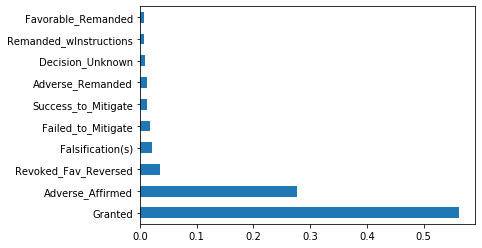

In [94]:
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier(n_estimators=100)
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

It's no wonder that Granted was the best predictor for the model, since it is the opposite of Denied. What's interesting about this outcome is that Falsification(s) can be seen in the top rankings (#4), surrounded by other decision choices.

#### Let's try it now without all of the other decision choices.

Before we do this, we want to remove all of the decision fields from the X dataset. We want to see which of the guideline related attributes are the best descriptors for the outcome.

In [95]:
#remove any type of decision field from the X data frame
X = X.drop('Adverse_Affirmed',axis=1)
X = X.drop('Favorable_Affirmed',axis=1)
X = X.drop('Granted',axis=1)
X = X.drop('Failed_to_Mitigate',axis=1)
X = X.drop('Success_to_Mitigate',axis=1)
X = X.drop('Adverse_Reversed',axis=1)
X = X.drop('Revoked_Fav_Reversed',axis=1)
X = X.drop('Adverse_Remanded',axis=1)
X = X.drop('Favorable_Remanded',axis=1)
X = X.drop('Remanded_wInstructions',axis=1)
X = X.drop('Recommend_Waiver',axis=1)
X = X.drop('Decision_Other',axis=1)
X = X.drop('Decision_Unknown',axis=1)
X = X.drop('No_Falsification',axis=1)

In [96]:
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                   Specs       Score
4       Falsification(s)  862.629798
14     Foreign_Influence  307.807762
17      Personal_Conduct  228.379717
7   Traumatic_Life_Event  111.261203
22      Criminal_Conduct  110.301741
15    Foreign_Preference   75.436174
20                 Drugs   54.518918
9     Child_Sexual_Abuse   45.175101
23           Handling_PI   39.974950
3    Rebut_Falsification   39.466102


[0.01074296 0.03590833 0.02002672 0.0268022  0.31298667 0.01176871
 0.03701887 0.05007314 0.0041654  0.0158896  0.00554252 0.00963705
 0.02913646 0.00979652 0.10121024 0.02233492 0.01527865 0.07614109
 0.0603271  0.03320958 0.02816439 0.00800376 0.04115471 0.01382932
 0.00707727 0.01028415 0.00145573 0.00160698 0.00042694]


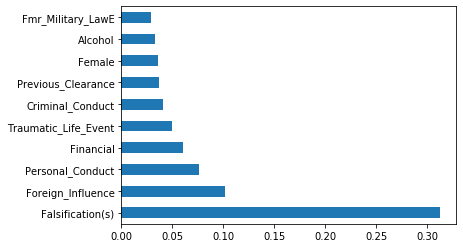

In [97]:
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier(n_estimators=100)
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

Falsification, Foreign Influence, and Personal Conduct are the top 3 most influential metrics for the boolean values.

#### Now we can visualize the data via a correlation matrix with Heatmap

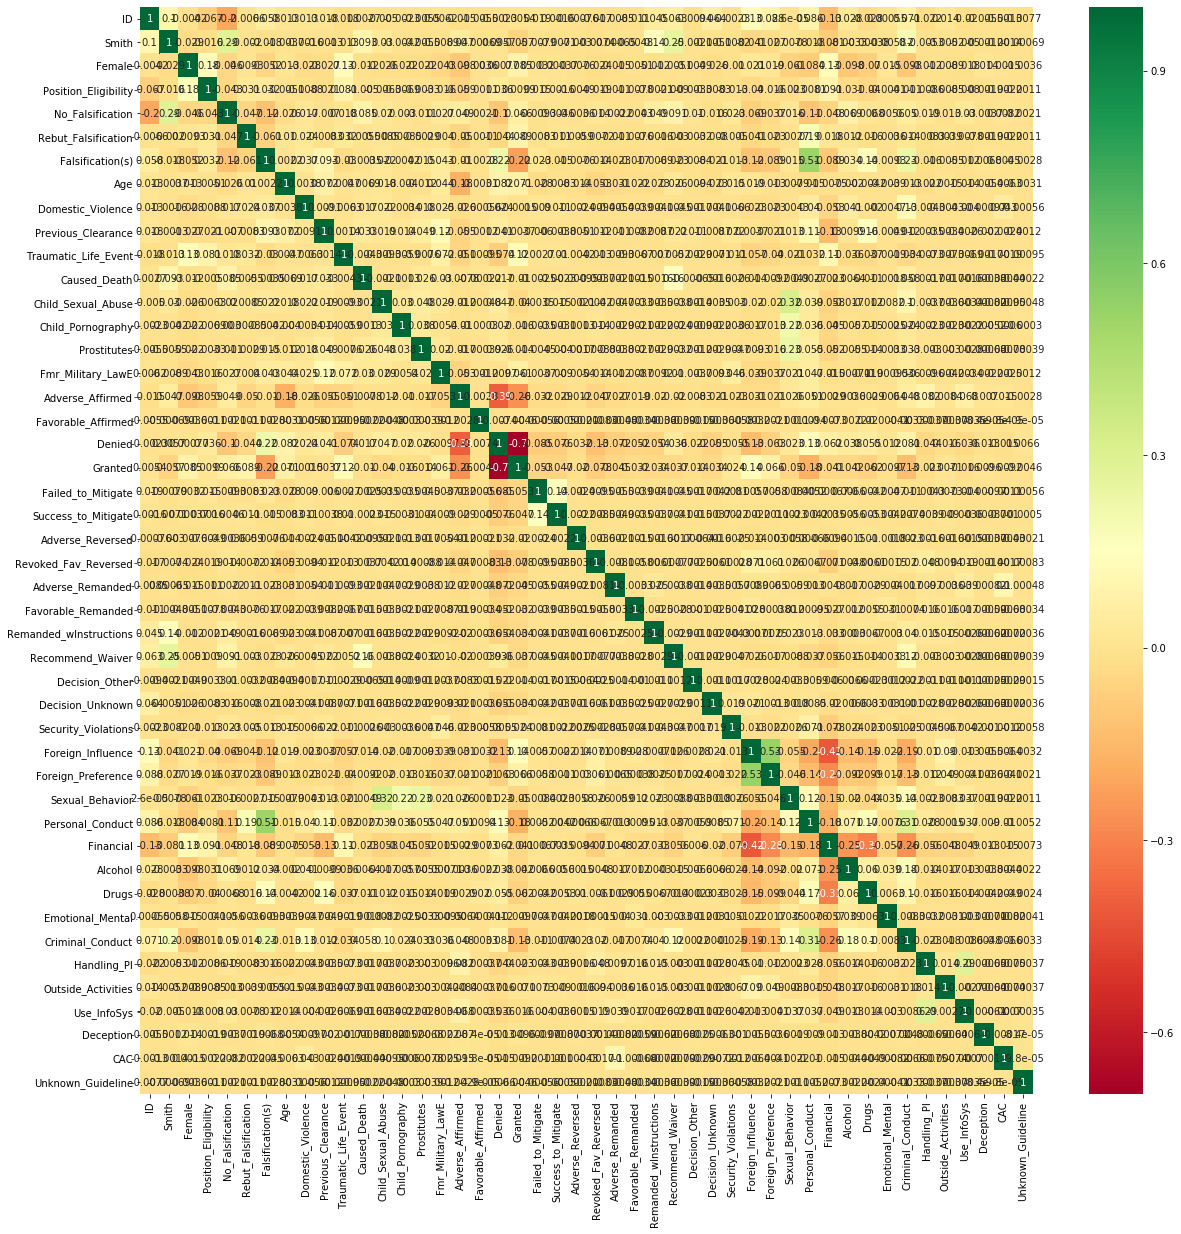

In [98]:
import seaborn as sns

corrmat = appeals_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(appeals_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")